<a href="https://colab.research.google.com/github/mayuripandey/Data-Analysis/blob/main/ClusteringbyuserBio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import tweepy
import pandas as pd

auth = tweepy.OAuthHandler("QsmNroZ5V6ghSPJ1TEGwMA2QR", "E7lHrsHc0P3EU6MYSHdzpmSkqXMNzCJYf6Mk9veCmoEB78pgIg") #(key, secret)
auth.set_access_token("3382755314-upIENhytORCLH3EKAQJl0GrHFbMXsfyHKfqlRna", "5i4U55MU7dvwtCN5v8ZALik5XD4qZK3Jg8bkhFrVFhscu") #(token, secret token)


api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)
api=tweepy.API(auth,wait_on_rate_limit=True)

#client = tweepy.API(auth)


In [2]:
keywords = '@ukraine'
limit=300
name=[]
username=[]
bio=[]
followers=[]
following=[]
statusescount=[]
id=[]
verified=[]
for i in tweepy.Cursor(api.search, q=keywords, count=100, tweet_mode='extended').items(limit):
  name.append(i.user.name)
  username.append(i.user.screen_name)
  bio.append(i.user.description)
  followers.append(i.user.followers_count)
  following.append(i.user.friends_count)
  statusescount.append(i.user.statuses_count)
  id.append(i.user.id)
  verified.append(i.user.verified)

# tweets = api.user_timeline(screen_name=user, count=limit, tweet_mode='extended')

# create DataFrame
#columns = ['User', 'Name', 'Tweet']
#data = []




In [3]:
#df = pd.DataFrame(data, columns=columns)
df=pd.DataFrame({'name':name, 'username':username, 'bio':bio, 'followers':followers, 'following':following,'statusescount':statusescount,
                 'id':id,'verified':verified})



In [4]:
df

,name,username,bio,followers,following,statusescount,id,verified
0,Micah Bell,MlCAHBELL,Big Belly Bell Rat Snake Darwinist rapist neve...,118,1,3360,2857356171,False
1,"Dr. Lulu, International Version",luluincanada,"Writer/PhD, cultural historian: women, societi...",2302,4998,31456,1025874541594243074,False
2,Kay Ydill,SirrK,"Artist, Sculptor, Art Wear Maker, Inovator, In...",1820,2231,260162,54978381,False
3,52 Hertz whale💙🇺🇦💛,52HertzzzWhale,,25,211,664,749629766815191040,False
4,Ginger64,Ginger_in64,Fount,44,268,19347,51130479,False
...,...,...,...,...,...,...,...,...
295,Movie Xen,MovieXen,We work to serve facts.,46,0,4442,1492029516050403330,False
296,MarmsRegine Tutors,MarmeeRegine888,1)OpenSeaNFT- https://t.co/z8pdHai6lw 2)Mar...,168,618,13052,1469407250276048901,False
297,Antonio E. Valdivia 🇪🇸🤝🇺🇦,AE_ValMan,,1037,2430,11806,509192457,False
298,Sheila,Sheilainmich68,,73,252,28935,1310246266497007622,False


In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
stopW = set(stopwords.words('english'))
stopW.remove("they")
stopW.remove("he")
stopW.remove("them")
stopW.remove("she")
stopW.remove("him")
stopW.remove("hers")
stopW.remove("his")
stopW.remove("her")
stopW = stopW.union(set([",", ".","n't", ";", '"', '”',
 "'",
 '“', "@", "#", ":", "'m", "''", "!", "&", "(", ")", "...", "’", "-", "•", "'s", "http","https", "[", "]", "?"]))

# Tokenize twitter bios
df["bio"] = df['bio'].apply(lambda x: x.lower().replace("/", " ").replace("\\", " ").replace("|", " "))
tokenSeries = df['bio'].apply(lambda x: nltk.word_tokenize(x))

In [9]:
tokenSeries.head(2)

0    [big, belly, bell, rat, snake, darwinist, rapi...
1    [writer, phd, ,, cultural, historian, :, women...
Name: bio, dtype: object

In [10]:
bioWords = {}
# go through each tokenized bio
for myList in tokenSeries:
    for tok in myList:
        if tok not in stopW:
            if tok not in bioWords:
                bioWords[tok] = 1
            else:
                bioWords[tok] += 1
                
# Converts entries in the dictionary into tuples, and sorts them by occurences.
tupList = []
for key in bioWords.keys():
        tupList.append((key, bioWords[key]))
tupSorted = sorted(tupList, key=lambda item: item[1], reverse=True)

# Get the top 1500 words based on occurance. These will be used for our columns in the 
# term frequency table
topBioWords = [k[0] for k in tupSorted[:1500]]

In [11]:
# Initialize an empty matrix
tfDf = pd.DataFrame(index=df['bio'], columns=topBioWords)
bio_idx = pd.DataFrame()
bio_idx["bio"] = df["bio"]
bio_idx["tokens"] = tokenSeries

# Fill the matrix
for row in bio_idx.iterrows():
    tRow = row[1]
    for tok in tRow['tokens']:
        if tok in topBioWords:
            tfDf.at[tRow['bio'], tok] = True
tfDf = tfDf.fillna(False)
tfDf = tfDf*1

# Print the first 2 entries of our term frequency matrix
tfDf.head(2)

,t.co,bot,akzaka7szp,ukraine,better,yes,4,common,please,help,...,más,locuras,vos,sos,testigo,seguime,te,sigo,pero,avisame
bio,,,,,,,,,,,,,,,,,,,,,
big belly bell rat snake darwinist rapist never take l never ratioed yb better soulja better i’m always right,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"writer phd, cultural historian: women, societies https: t.co yhdgcsmo7w",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
totals = []
# Sums up the term frequencies
for k in tfDf.columns:
    totals.append(tfDf[k].sum())
normDf = pd.DataFrame(data=[(totals)], columns=tfDf.columns)
normDf.head()

,t.co,bot,akzaka7szp,ukraine,better,yes,4,common,please,help,...,más,locuras,vos,sos,testigo,seguime,te,sigo,pero,avisame
0,39,18,30,24,21,20,20,10,19,19,...,1,1,1,1,1,1,1,1,1,1


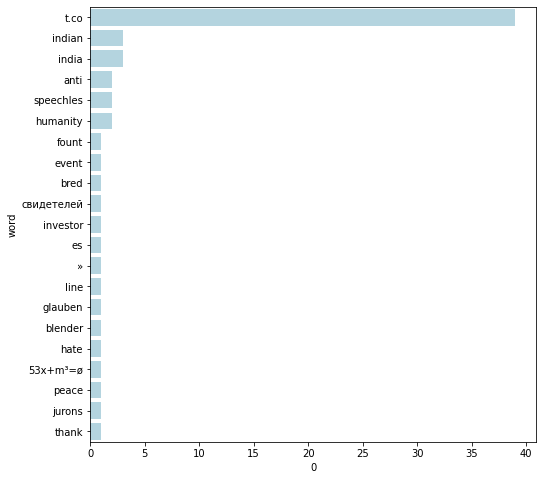

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# construct a dataframe that will allow us to graph frequencies as a bar plot.
normTransDf = normDf.transpose()
normTransDf["word"] = normTransDf.index
normTransDf["index"] = range(normTransDf.shape[0])
norm50df = normTransDf[normTransDf["index"] % 50 == 0]
plt.figure(figsize=(8,8))
sns.barplot(data=norm50df, x=norm50df[0], y = norm50df["word"], color="lightblue")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


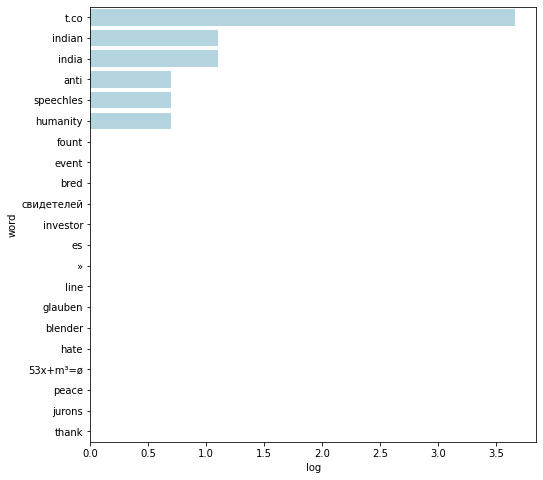

In [15]:
norm50df['log'] = np.log(norm50df[0]) 
plt.figure(figsize=(8,8))
sns.barplot(data=norm50df, x=norm50df['log'], y = norm50df["word"], color="lightblue")
plt.show()

In [16]:
%matplotlib inline
from wordcloud import WordCloud
import numpy as np
from PIL import Image

In [17]:
def makeWordWall(word):
    plt.figure(figsize=(8,8))
    sampleDf = tfDf[tfDf[word] > 0]
    freqDict = {}
    for col in sampleDf.columns:
        freqDict[col] = sampleDf[col].sum()
    freqList = []
    for key in freqDict.keys():
        freqList.append((key, freqDict[key]))
    freqSorted = sorted(freqList, key=lambda item: item[1], reverse=True)
    wordDict = {}
    for tup in freqSorted[1:35]:
        wordDict[tup[0]] = tup[1]
    wc = WordCloud(background_color="white", max_words=100, width=500, height=500)
    wc.generate_from_frequencies(wordDict)
        # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

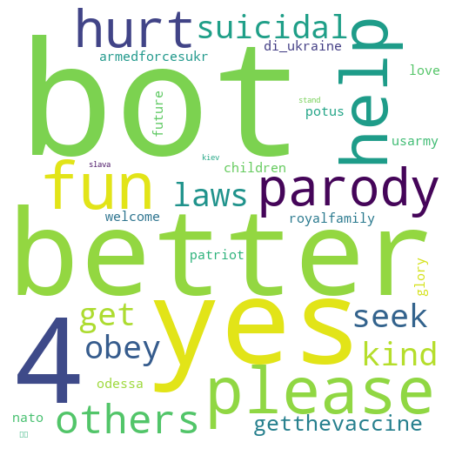

In [25]:
makeWordWall("ukraine")

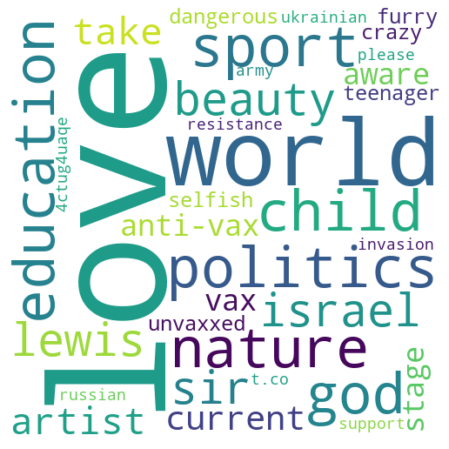

In [35]:
makeWordWall("people")

In [36]:
def get_edges(word, num_edges):
    sampleDf = tfDf[tfDf[word] > 0]
    freqDict = {}
    for col in sampleDf.columns:
        freqDict[col] = sampleDf[col].sum()
    freqList = []
    for key in freqDict.keys():
        freqList.append((word, key, {'weight': freqDict[key]}))
    freqSorted = sorted(freqList, key=lambda item: item[2]['weight'], reverse=True)
    return freqSorted[1:num_edges]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28783 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33021 missing from current font.
  font.s

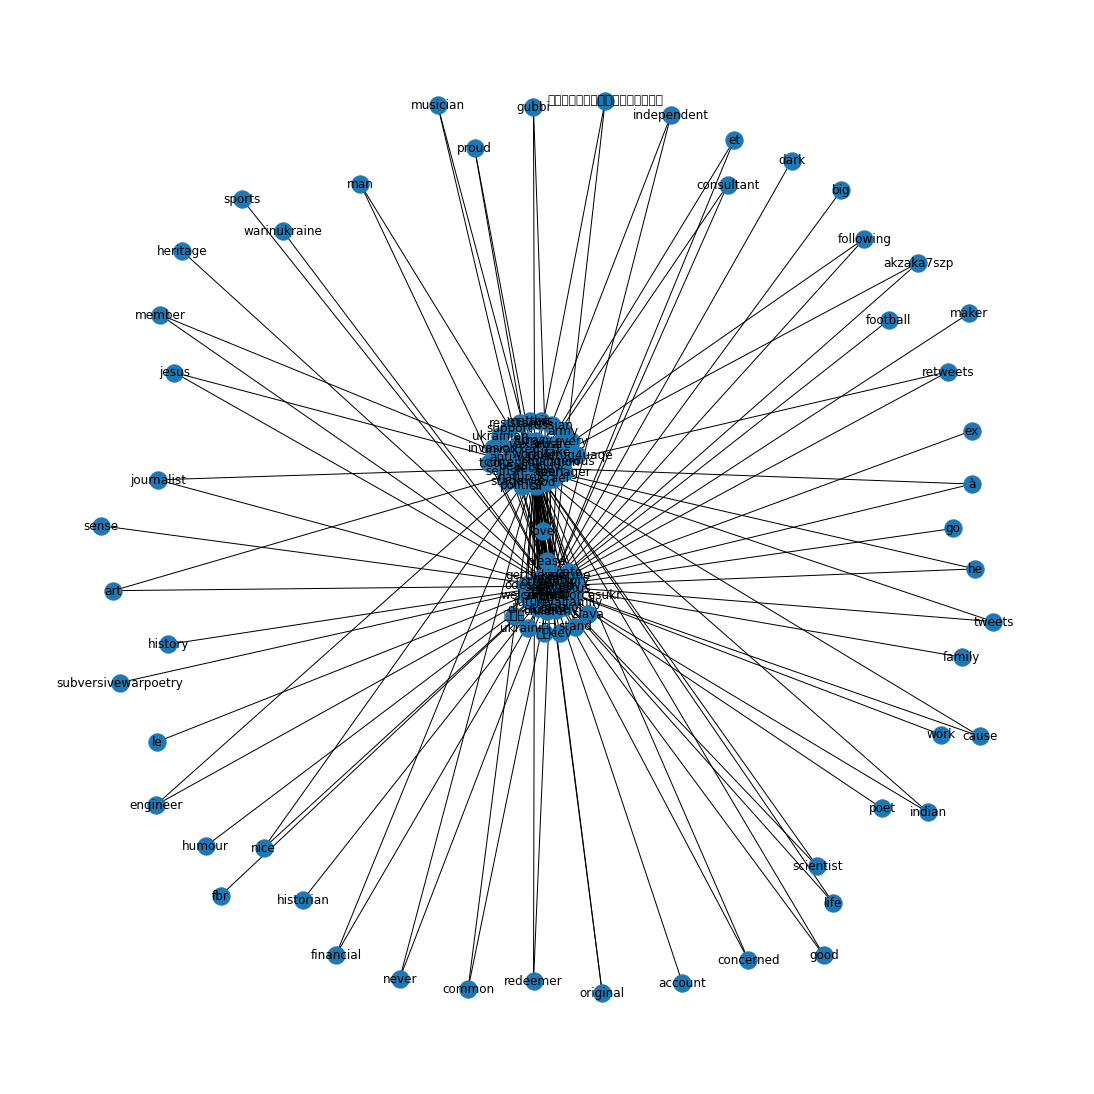

In [37]:
import networkx as nx

G = nx.Graph()
plt.figure(figsize=(15,15))
#G.add_nodes_from(tfDf.columns)
trump_edges = get_edges('ukraine', 100)
bernie_edges = get_edges('people', 100)
trump_nodes = map(lambda x: x[1], trump_edges)
bernie_nodes = map(lambda x: x[1], bernie_edges)
G.add_nodes_from(trump_nodes)
G.add_nodes_from(bernie_nodes)
G.add_edges_from(trump_edges)
G.add_edges_from(bernie_edges)
nx.draw(G, with_labels=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129309 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127756 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129658 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128742 missing from current font.
  fon

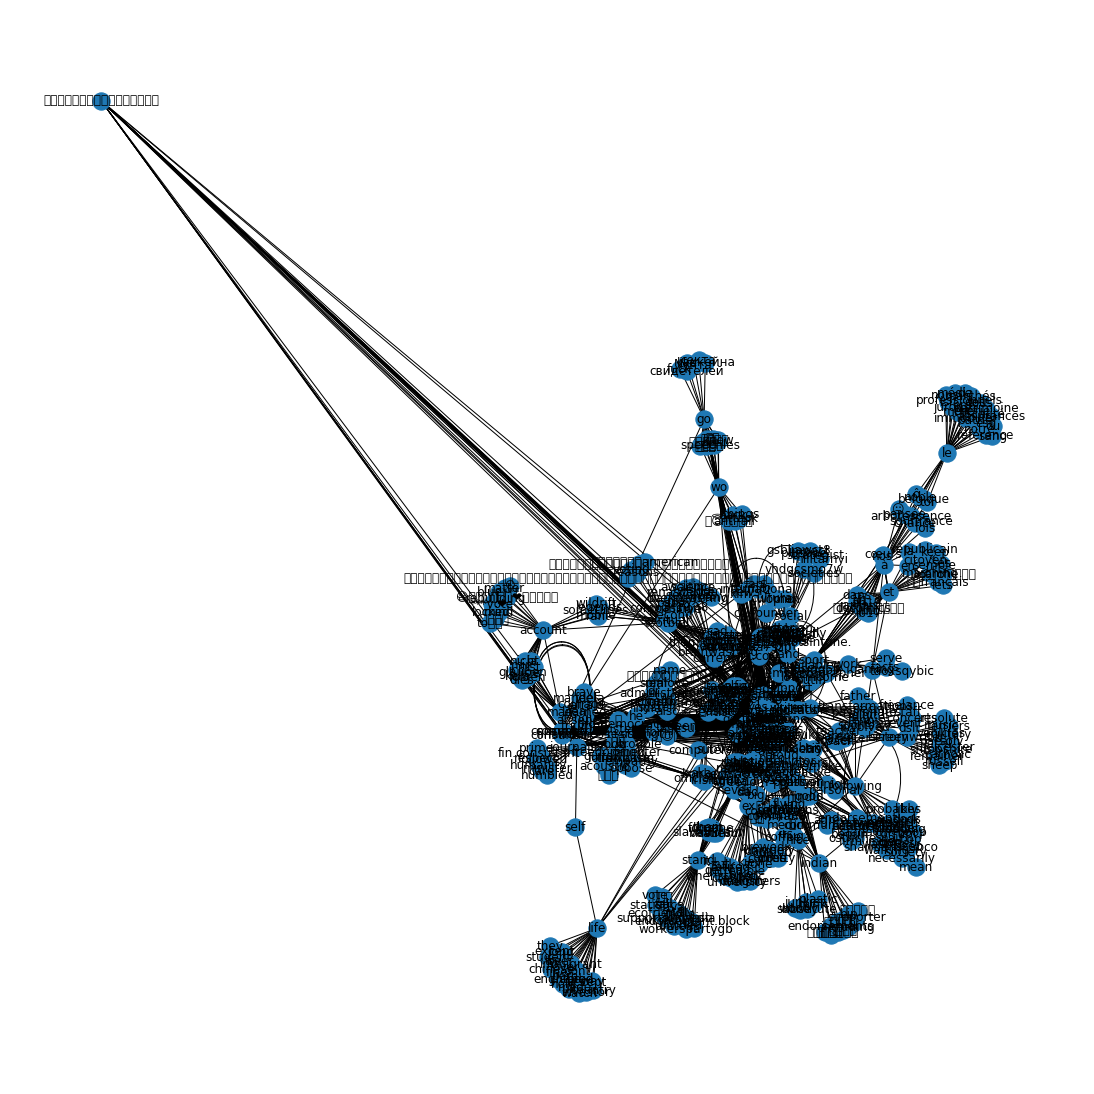

In [38]:
G = nx.Graph()
plt.figure(figsize=(15,15))

# Words selected by us to be graphed
wordList = tfDf.columns[:100]
edges = []
for word in wordList:
    edges += get_edges(word,30)
nodes = map(lambda x: x[1], edges)

G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G, with_labels = True)
plt.show()

In [44]:
!pip uninstall community
!pip install python-louvain

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/community-1.0.0b1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/community/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.7/dist-packages/community/community_status.py
Proceed (y/n)? y
  Successfully uninstalled community-1.0.0b1


In [47]:
import community.community_louvain

In [50]:
communities = community.community_louvain.best_partition(G)

In [ ]:
communities = community.best_partition(G, partition=None, resolution=.5)

In [51]:
commDict = {}
for key in communities.keys():
    if communities[key] not in commDict:
        commDict[communities[key]] = [key]
    else:
        commDict[communities[key]] = commDict[communities[key]] + [key]

In [52]:
for key in commDict.keys():
    print(str(key) + ": " +str(commDict[key]))
    print()

0: ['akzaka7szp', 'support', 'co-founder', 'work', 'photographer', '2', 'international', 'fan', '🤝', 'news', '$', 'xlm', '2d', '3d', 'cad', 'phd', 'cultural', 'women', 't.co', 'serve', 'facts', 'taoxsqybic']

1: ['please', 'ukraine', 'better', 'yes', '4', 'help', 'fun', 'parody', 'hurt', 'others', 'suicidal', 'seek', 'get', 'obey', 'laws', 'kind', 'getthevaccine', 'bot']

11: ['people', 'engineer', 'scientist', 'husband', 'world', 'politics', 'education', 'sport', 'nature', 'god', 'child', 'beauty', 'israel', 'sir', 'lewis', 'fbr', 'maker', 'adventurer', 'opinions', 'mad', 'virtual', 'rocket', 'tinkerer', 'jack', 'trades', 'decreaser', 'suck', '🌌ashley', '2006-2021', 'history', 'sports', 'marketer', 'tigers', 'gaming', 'teacher', 'parent', 'soccer', 'coach', 'et', 'nos', 'cœurs', 'le', 'toi', 'blm', 'en', 'la', 'ô', '🇫🇷', 'f1', 'dccomics', 'jv', 'mimo', '✊🏻✊🏼✊🏽✊🏾✊🏿', 'ah19', 'jb17', 'jamais', 'dans', 'pensée', 'arborescence', 'fois', 'chance', 'souffrance', '😐', 'noble', 'belgique', 'n

In [53]:
def communityWall(wordList):
    wc = WordCloud(background_color="white", max_words=100, width=500, height=500)
    wc.generate(" ".join(wordList))
    plt.figure(figsize=(8,8))

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

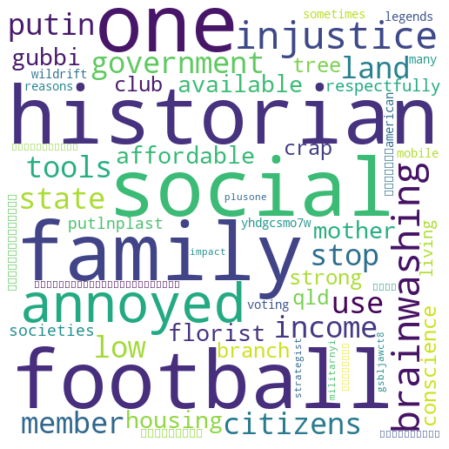

KeyError: ignored

In [56]:
commToShow = [4, 25, 9, 2]
for key in commToShow:
    communityWall(commDict[key])

In [55]:
nx.write_gexf(G, "communityP.gexf")